In [354]:
import numpy as np
import matplotlib.pyplot as plt

In [365]:
def weighted_average(values: np.ndarray, weights: np.ndarray = None) -> np.ndarray:
    """ Get the centre of mass for a set of values, """
    assert weights is None or values.shape[0] == weights.shape[0]
    return np.average(values, weights=weights, axis=0)

def compute_transformation_params(x: np.ndarray, y: np.ndarray, p: np.ndarray = None) -> tuple[np.ndarray, np.ndarray]:
    """
    Perform a single step of ICP where perfect corresponence is assumed. 
    Returns a rotation matrix and translation vector.
    """
    assert x.shape == y.shape
    if p is None:
        p = np.ones(len(x))
    # Get the centres of mass
    x_0 = weighted_average(x, p)
    y_0 = weighted_average(y, p)

    # Calculate cross covariance matrix
    H = (y_0 - y).T @ ((x_0 - x) * p[:, None])

    # Do SVD
    U, _S, Vh = np.linalg.svd(H)    

    # Calculate rotation matrix and translation vector
    R = Vh.T @ U.T
    t = y_0 - R @ x_0

    return R, t

[[-0.33333333  0.66666667  0.66666667]
 [ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]] [ 1.00000000e+00 -1.33226763e-15  0.00000000e+00]


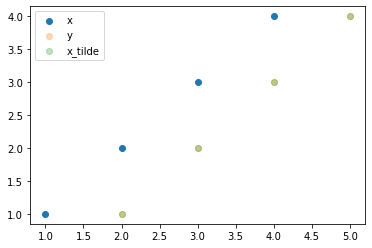

In [370]:
x = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]])
y = np.array([[2, 1, 1], [3, 2, 2], [4, 3, 3], [5, 4, 4]])

R, t = ICP(x,y)
print(R,t)
x_tilde = (R @ x.T).T + t

plt.scatter(x[:, 0], x[:, 1], label='x')
plt.scatter(y[:, 0], y[:, 1], label ='y', alpha=0.3)
plt.scatter(x_tilde[:, 0], x_tilde[:, 1], label="x_tilde", alpha=0.3)
plt.legend()
plt.show()

In [ ]:
import numpy as np

def Exp(axis, angle):
    """
    Compute a rotation matrix from an axis-angle representation.

    Parameters:
        axis: A 3-element array representing the axis of rotation.
        angle: The angle of rotation in radians.

    Returns:
        A 3x3 rotation matrix representing the rotation.
    """
    # Normalize the axis vector
    axis = axis / np.linalg.norm(axis)

    # Compute the components of the rotation matrix
    c = np.cos(angle)
    s = np.sin(angle)
    t = 1 - c
    x, y, z = axis

    # Compute the rotation matrix
    R = np.array([[t*x*x + c,    t*x*y - s*z,  t*x*z + s*y],
                  [t*x*y + s*z,  t*y*y + c,    t*y*z - s*x],
                  [t*x*z - s*y,  t*y*z + s*x,  t*z*z + c]])

    return R